# **Building CNN - Convolutional Neural Network**

# `Project Fashion-Classification`

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt #use to show images
import seaborn as sns #ibrary based on Matplotlib that provides a high-level interface for creating attractive and informative statistical graphics.

import keras # to build Neural Network

# Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras(we get data in tuples format)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((48000, 28, 28, 1), (48000,), '******', (10000, 28, 28, 1), (10000,))

# Check the data

In [ ]:
X_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.25882353],
        [0.61176471],
        [0.61176471],
        [0.29411765],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00784314],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.32941176],
        [0.87843137],
        [0.95294118],
        [0.80392157],
        [0.94117647],
        [0.63529412],
        [0.53333333],
        

In [ ]:
y_train[0] #To check image label (jitnay bhi hmaray pass number hain un ko aik class diya gya)

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_labels[2]

'Pullover'

In [3]:
# Show image"""

plt.imshow(X_train[1], cmap = 'none') #matplotlib function

NameError: name 'X_train' is not defined

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1 #Q k hamain aik he jga total(25) images ko show krna
  plt.imshow(X_train[i], cmap="Greys") #main function for image show
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i])) #to show the text(take label from [y_train[i]] and then take particular index string against label and then also print no. by y_train[i] )

NameError: name 'plt' is not defined

# change dimensions
**CNN expect input data to have a specific shape that includes a channel dimension. For grayscale images, this channel dimension is usually added, making the shape (28, 28, 1) instead of (28, 28).**

In [ ]:
 X_train.shape

(60000, 28, 28)

In [ ]:
#check dimensions
X_train.ndim

3

In [ ]:
#change dimensions
X_train = np.expand_dims(X_train, -1) #is used to add a new axis or dimension to the existing array.
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
# Feature Scaling"""

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.25882353],
        [0.61176471],
        [0.61176471],
        [0.29411765],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00784314],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.32941176],
        [0.87843137],
        [0.95294118],
        [0.80392157],
        [0.94117647],
        [0.63529412],
        [0.53333333],
        

# Split data

In [ ]:
#If you run the code multiple times with the same random_state value, you'll get the same split of the data.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((38400, 28, 28, 1), (38400,), (9600, 28, 28, 1), (9600,))

# Convolutional Neural Network - Model Building


In [ ]:
#WE USE KERAS LIBRARY TO BULID CNN MODEL, NOW LOAD MODELS from keras
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]), #first perform convolut.. opra
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'), #dense layer used to train neural network & how many neurans you need --128 (it's an input layer)
                         keras.layers.Dense(units=10, activation='softmax') #softmax wil find probability
])

In [ ]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Compile the model

In [ ]:
#we use optimizer fun. to train model fast and to find the optimal set of weights that minimizes the loss function we
#The goal of optimization is to find the set of parameters that results in the best performance of the model on the training data.
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy']) #loss function for error finding

# Train CNN Model

In [ ]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation)) #epochs means how many times dataset will geting by model to train the data

Epoch 1/10
75/75 [==============================] - 22s 280ms/step - loss: 0.6805 - accuracy: 0.7699 - val_loss: 0.4826 - val_accuracy: 0.8285
Epoch 2/10
75/75 [==============================] - 21s 273ms/step - loss: 0.4138 - accuracy: 0.8563 - val_loss: 0.3978 - val_accuracy: 0.8590
Epoch 3/10
75/75 [==============================] - 24s 323ms/step - loss: 0.3588 - accuracy: 0.8753 - val_loss: 0.3574 - val_accuracy: 0.8760
Epoch 4/10
75/75 [==============================] - 21s 276ms/step - loss: 0.3288 - accuracy: 0.8851 - val_loss: 0.3377 - val_accuracy: 0.8828
Epoch 5/10
75/75 [==============================] - 23s 302ms/step - loss: 0.3060 - accuracy: 0.8938 - val_loss: 0.3203 - val_accuracy: 0.8879
Epoch 6/10
75/75 [==============================] - 19s 252ms/step - loss: 0.2853 - accuracy: 0.9003 - val_loss: 0.3111 - val_accuracy: 0.8890
Epoch 7/10
75/75 [==============================] - 19s 249ms/step - loss: 0.2700 - accuracy: 0.9051 - val_loss: 0.3007 - val_accuracy: 0.8948

# Test the Model

In [ ]:
y_pred = cnn_model.predict(X_test).round(2)
y_pred #predict many of the images by giving to the model one time to all.......so it will also tell about actual label

313/313 [==============================] - 3s 8ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.95, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.04, 0.01, 0.  ]], dtype=float32)

In [ ]:
#Now we'll evaluate/precition that what is the accuracy on test data set
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3014 - accuracy: 0.8910


[0.3013558089733124, 0.890999972820282]

# Visualize output

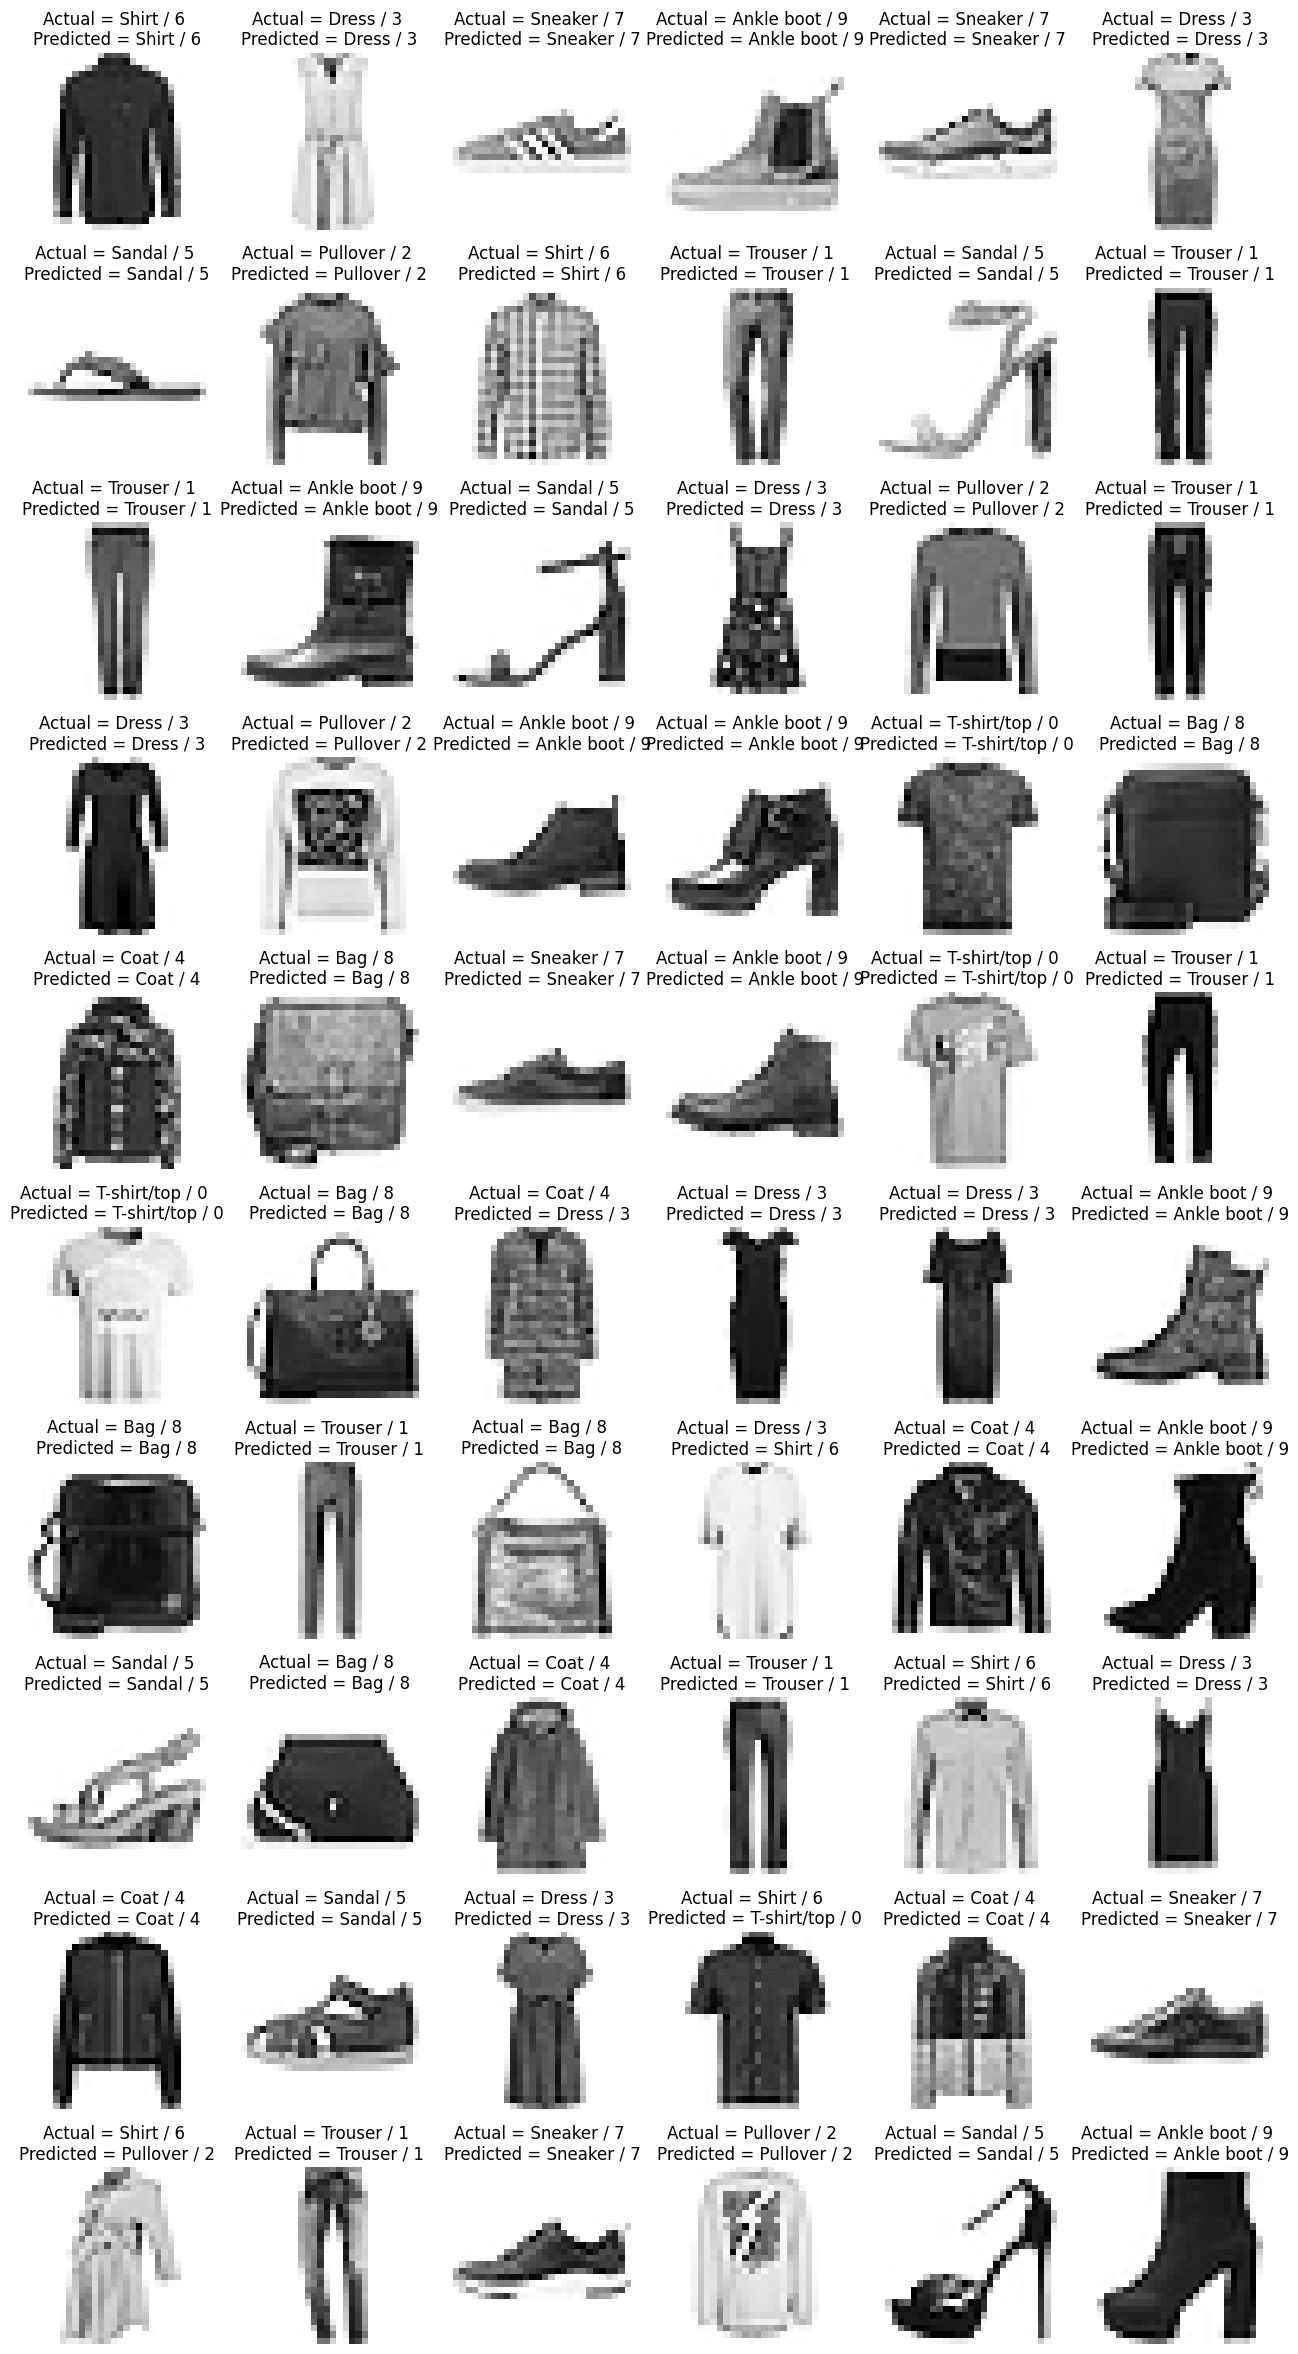

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i]))) #yha par actual images ka label b show krwayn gai ore jo predict kr k image mili os ka be label show krwayn gay
  plt.axis('off')

# Confusion Matrix

<Axes: >

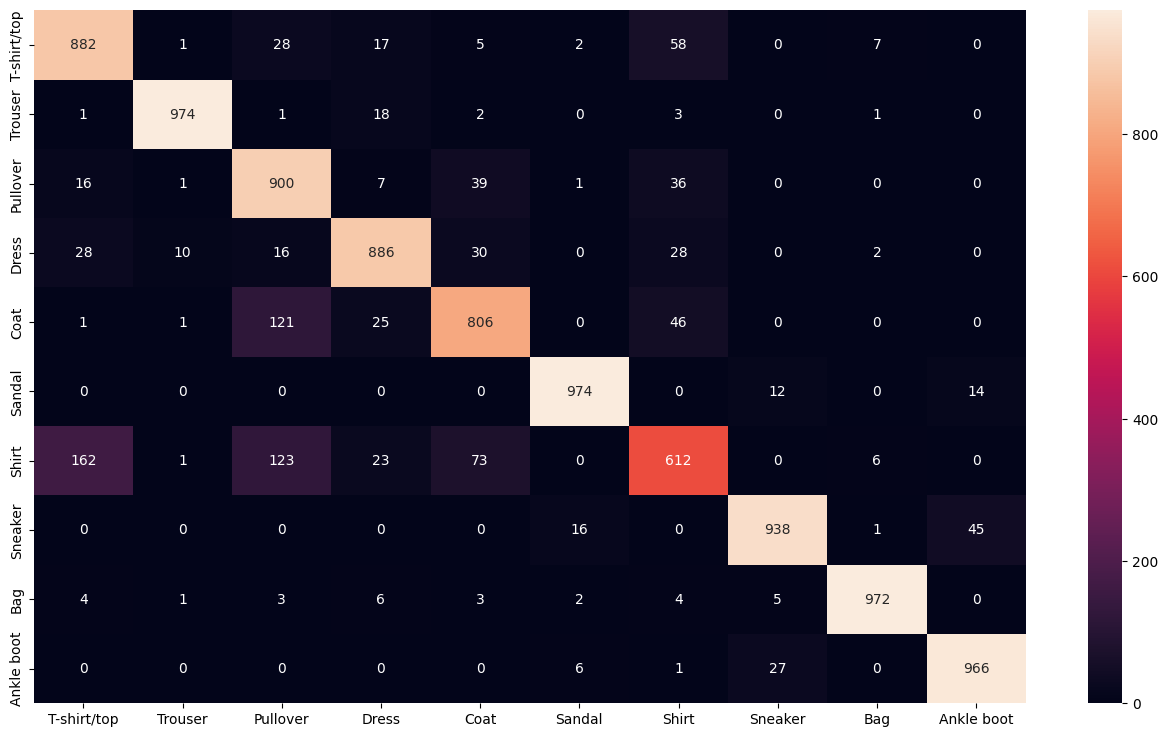

In [ ]:
from sklearn.metrics import confusion_matrix #we use SKlearn library to get confusion matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels) #heatmap ka use kr k hum confuion matrix k data ko show kr rhy

# Classification_report

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.76      0.90      0.82      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.84      0.81      0.82      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.78      0.61      0.68      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
